In this notebook we do some simple data exploration

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import os
import matplotlib.colors as mcolors

In [2]:
path_to_repo = "/Users/jamie/Desktop/GitHubProjects/BICKER/"

In [3]:
k1 = np.logspace(np.log(3.0e-4), np.log(.005), 4, base=np.e)
k2 = np.arange(.00501,.301,.0025)
k3 = np.logspace(np.log(.301), np.log(10.0), 25, base=np.e)
k = np.hstack([k1, k2, k3])

In [4]:
files1 = ["1000_cosmo_c2_b2_f.npy", 
          "1000_cosmo_c2_b1_b2.npy",  
          "1000_cosmo_c2_b1_b1.npy",  
          "1000_cosmo_c2_b1_f.npy",
          "1000_cosmo_c2_b1_f.npy",
          "1000_cosmo_c1_b1_b1_f.npy",
          "1000_cosmo_c1_b2_f.npy",
          "1000_cosmo_c1_b1_b2.npy",
          "1000_cosmo_c1_b1_b1.npy",
          "1000_cosmo_c2_b1_b1_f.npy", 
          "1000_cosmo_c1_b1_f.npy"]

In [5]:
files1_2 = ["1000_cosmo_c2_b1_f_f.npy",
          "1000_cosmo_c1_f_f.npy",
          "1000_cosmo_c1_f_f_f.npy",
          "1000_cosmo_c2_f_f.npy",
          "1000_cosmo_c2_f_f_f.npy",
          "1000_cosmo_c1_f_f.npy",
          "1000_cosmo_c1_b1_f_f.npy",]

In [6]:
files2 = ["1000_cosmo_c1_c1_f_f.npy", 
          "1000_cosmo_c2_c2_b1_f.npy",  
          "1000_cosmo_c2_c1_b1_f.npy",  
          "1000_cosmo_c2_c1_b1.npy",
          "1000_cosmo_c2_c1_b2.npy",
          "1000_cosmo_c2_c2_f_f.npy",
          "1000_cosmo_c1_c1_f.npy",
          "1000_cosmo_c2_c2_b1.npy",
          "1000_cosmo_c2_c2_b2.npy",
          "1000_cosmo_c2_c2_f.npy", 
          "1000_cosmo_c2_c1_b1_f.npy", 
          "1000_cosmo_c2_c1_f.npy",
          "1000_cosmo_c1_c1_b1_f.npy",
          "1000_cosmo_c1_c1_b1.npy",
          "1000_cosmo_c1_c1_b2.npy",
          "1000_cosmo_c1_c1_f_f.npy"]

In [7]:
files3 = ["1000_cosmo_c1_c1_bG2.npy",
          "1000_cosmo_c2_c2_bG2.npy",
          "1000_cosmo_c2_c1_bG2.npy"]

In [8]:
files4 = ["1000_cosmo_c1_b1_bG2.npy",
          "1000_cosmo_c1_bG2_f.npy",
          "1000_cosmo_c2_bG2_f.npy", 
          "1000_cosmo_c2_b1_bG2.npy"]

In [9]:
files5 = ["1000_cosmo_b1_f_f.npy",
          "1000_cosmo_b1_b1_f_f.npy",
          "1000_cosmo_b1_b1_b2.npy", 
          "1000_cosmo_b2_f_f.npy", 
          "1000_cosmo_b1_b1_b1.npy",
          "1000_cosmo_b1_b1_b1_f.npy",
          "1000_cosmo_b1_b1_f.npy",
          "1000_cosmo_b1_f_f_f.npy",
          "1000_cosmo_f_f_f.npy",
          "1000_cosmo_f_f_f_f.npy",
          "1000_cosmo_b1_b2_f.npy"]

In [10]:
files6 = ["1000_cosmo_bG2_f_f.npy",
          "1000_cosmo_b1_b1_bG2.npy",
          "1000_cosmo_b1_bg2_f.npy"]

In [11]:
files_list = [files1, files1_2, files2, files3, files4, files5, files6]
colours = list(mcolors.TABLEAU_COLORS.keys())

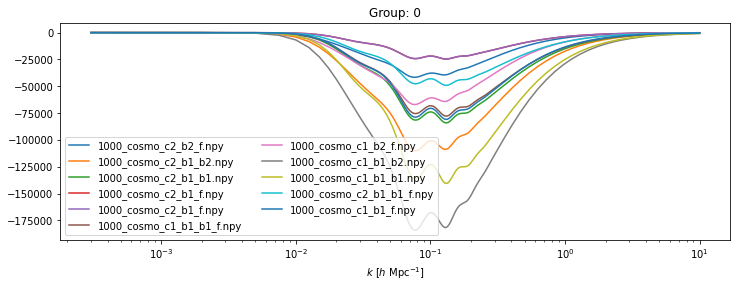

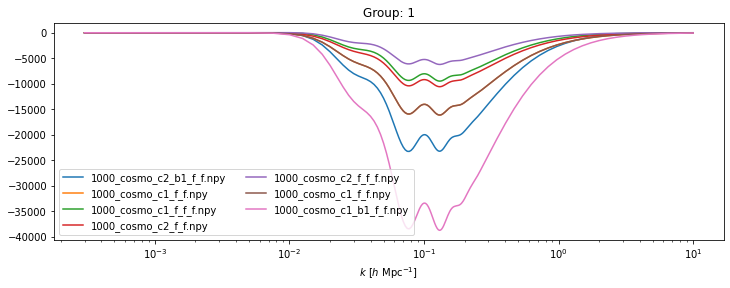

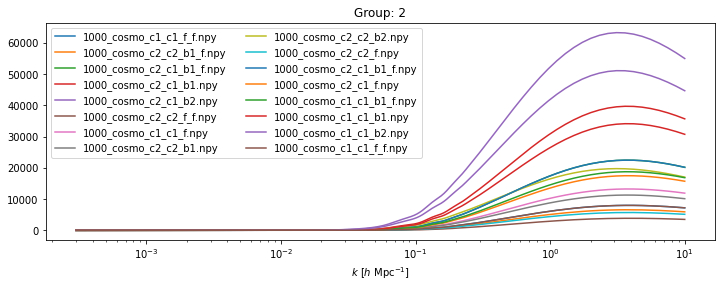

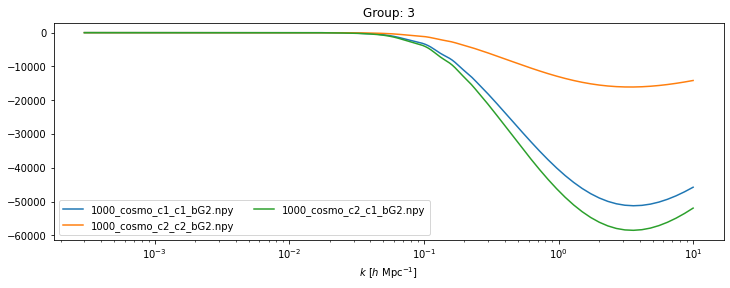

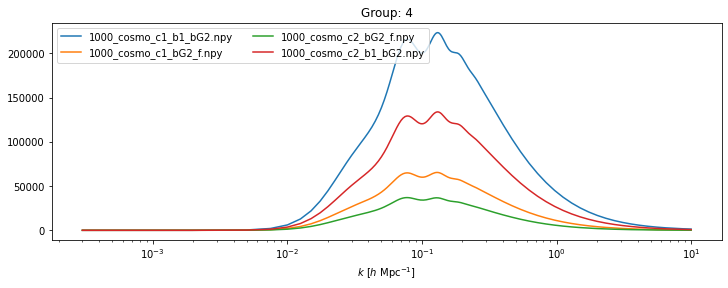

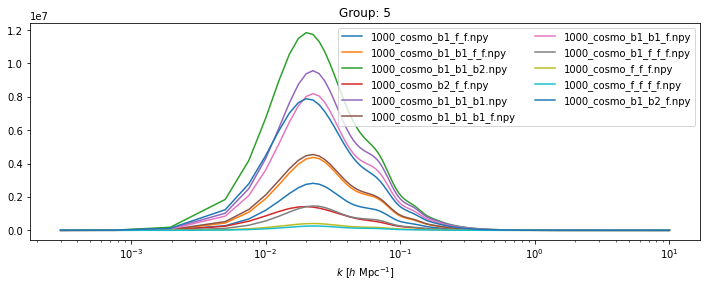

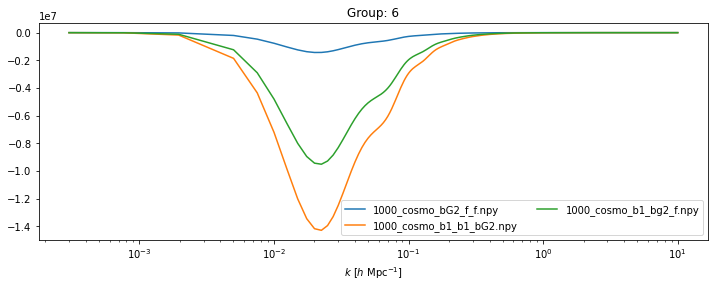

In [12]:
for i, files in enumerate(files_list):
    
    kernels = []
    for file in files:
        kernels.append(np.load(path_to_repo+"data/bispec/kernels/"+file))
    kernels = np.stack(kernels)
    
    plt.figure(figsize=(12,4))
    plt.title('Group: {0}'.format(i))
    plt.semilogx(k, (k*kernels[:,0,:]).T, label=files)
    plt.xlabel(r'$k\ [h\ \mathrm{Mpc}^{-1}]$')
    plt.legend(ncol=2)
    plt.show()

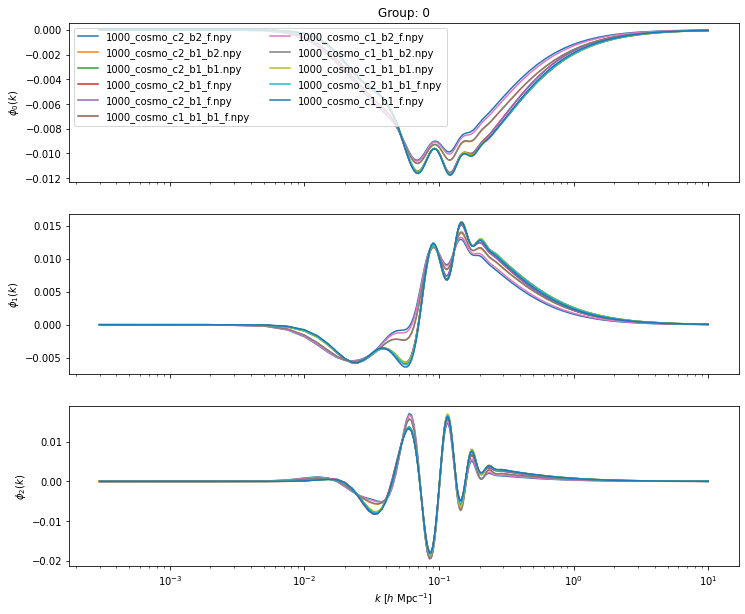

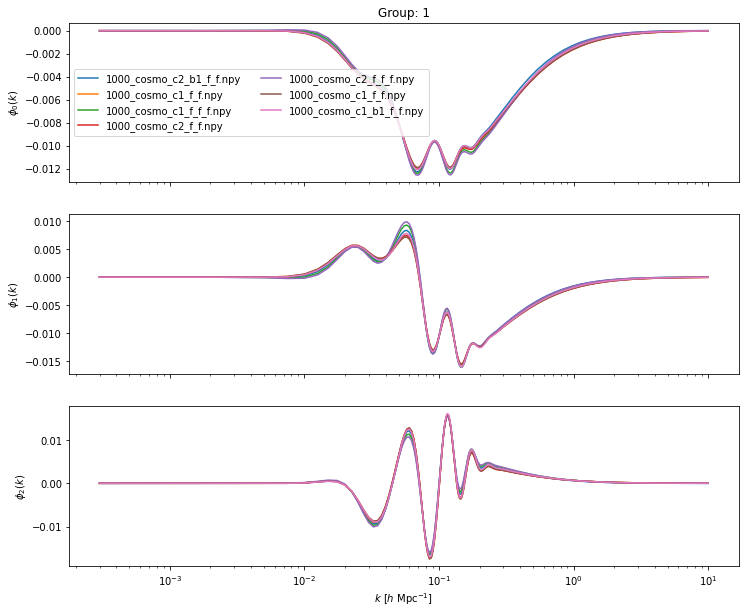

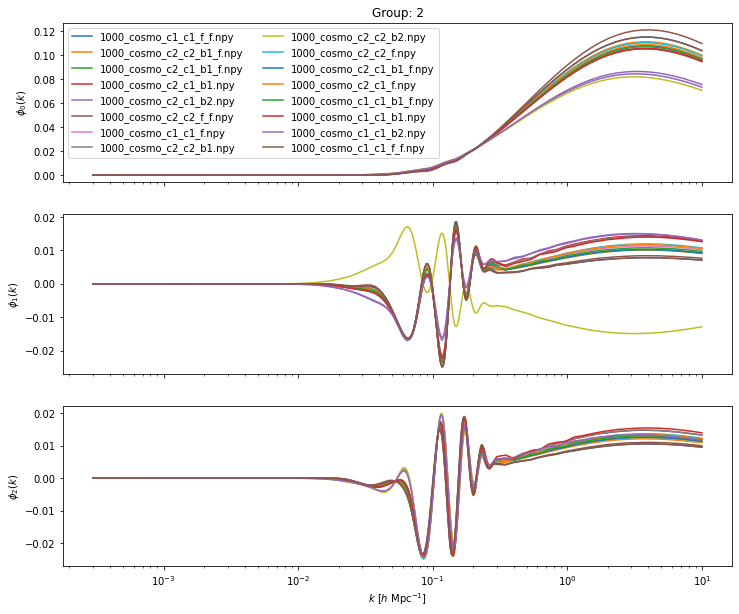

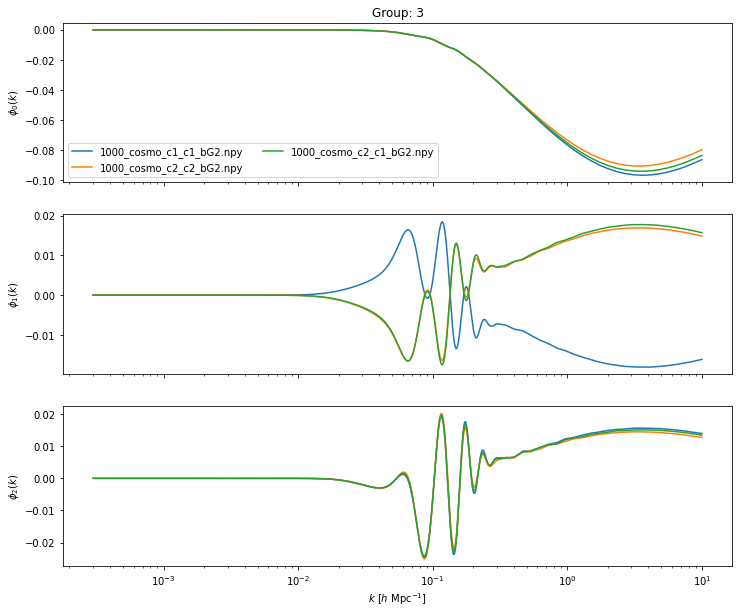

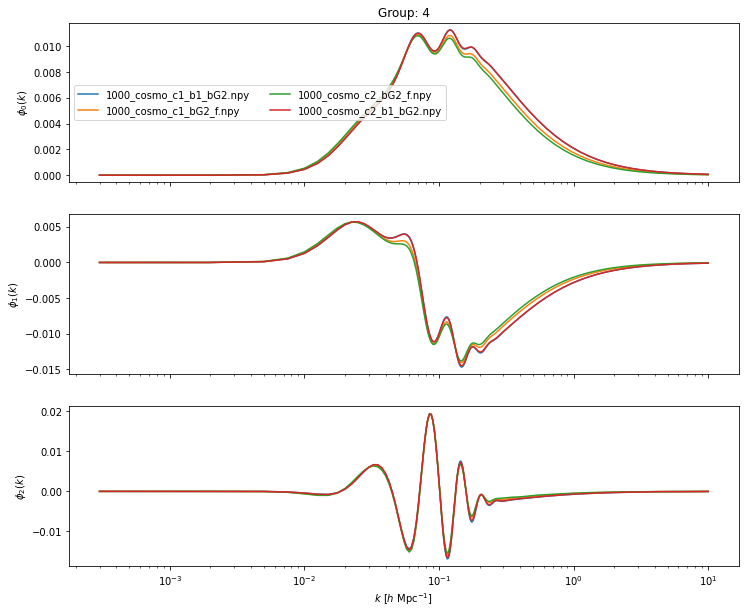

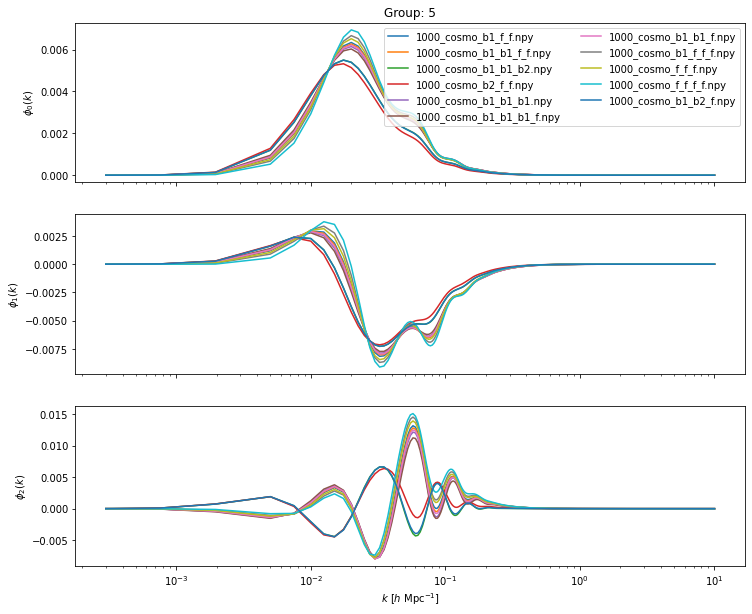

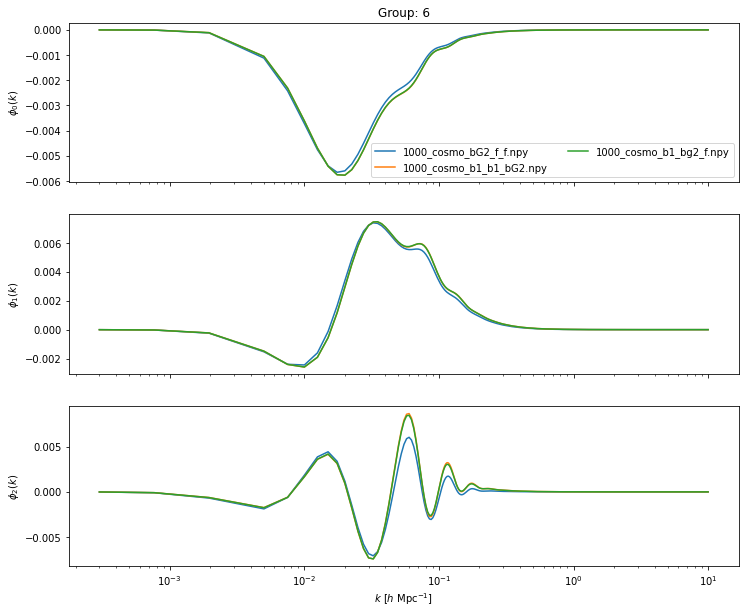

In [13]:
for i, files in enumerate(files_list):
    
    fig, ax = plt.subplots(3,1, figsize=(12,10), sharex=True)
    
    kernels = []
    for file in files:
        kernels.append(np.load(path_to_repo+"data/bispec/kernels/"+file))
    kernels = np.stack(kernels)
    
    vectors = []
    for p in range(kernels.shape[0]):
        pca = PCA(n_components=40)
        pca.fit(kernels[p,:,:])

        vectors.append(pca.components_)
    vectors = np.stack(vectors)
    
    ax[0].semilogx(k, (k*vectors[:,0,:]).T, label=files)
    ax[0].legend(ncol=2)
    ax[1].semilogx(k, (k*vectors[:,1,:]).T)
    ax[2].semilogx(k, (k*vectors[:,2,:]).T)
    
    ax[0].set_title('Group: {0}'.format(i))
    ax[-1].set_xlabel(r'$k\ [h\ \mathrm{Mpc}^{-1}]$')
    for j, axj in enumerate(ax.flatten()):
        axj.set_ylabel(r'$\phi_{0}(k)$'.format(j))
            
    plt.show()